In [ ]:
!gdown 1KqgzDAGLvJxyEn7ewy11J1jXcyuoAo_w
!gdown 1RFeimal-QVwIvFlIeHB4NzzSb6uFVgYX

Downloading...
From: https://drive.google.com/uc?id=1KqgzDAGLvJxyEn7ewy11J1jXcyuoAo_w
To: /content/fashion-mnist_train.csv
100% 133M/133M [00:03<00:00, 37.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RFeimal-QVwIvFlIeHB4NzzSb6uFVgYX
To: /content/fashion-mnist_test.csv
100% 22.2M/22.2M [00:00<00:00, 29.1MB/s]


In [ ]:
import pandas as pd
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
target_train = df_train["label"].values.tolist()
data_train = df_train.drop(columns=["label"]).to_numpy()

In [ ]:
target_test = df_test["label"].values.tolist()
data_test = df_test.drop(columns=["label"]).to_numpy()

In [ ]:
gk = df_train.groupby('label')
gk_test = df_test.groupby('label')
labels = gk.groups.keys()
print("Cantidad de labels: " + str(len(labels)))

Cantidad de labels: 10


Cantidad de elementos con label 0 en train: 6000
Cantidad de elementos con label 0 en test: 1000


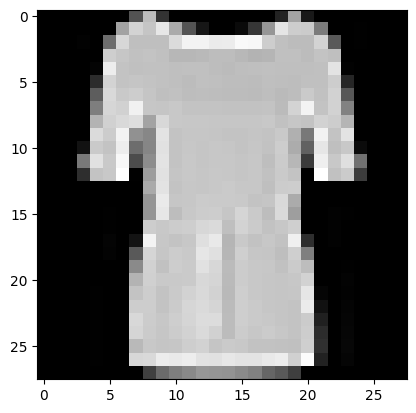

Cantidad de elementos con label 1 en train: 6000
Cantidad de elementos con label 1 en test: 1000


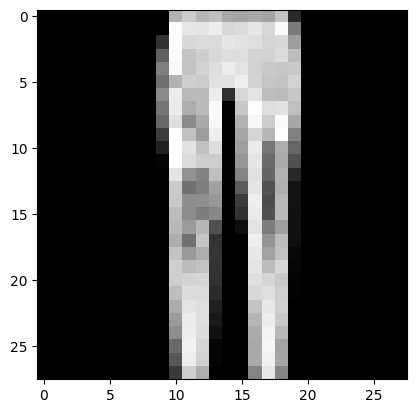

Cantidad de elementos con label 2 en train: 6000
Cantidad de elementos con label 2 en test: 1000


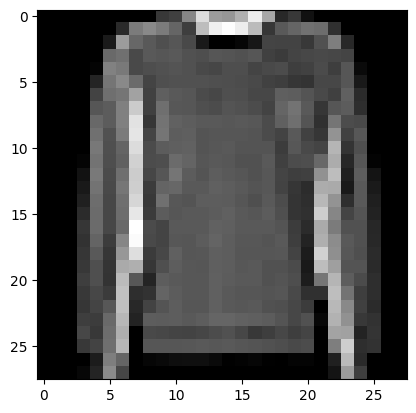

Cantidad de elementos con label 3 en train: 6000
Cantidad de elementos con label 3 en test: 1000


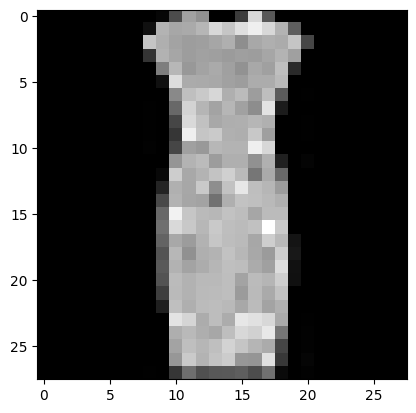

Cantidad de elementos con label 4 en train: 6000
Cantidad de elementos con label 4 en test: 1000


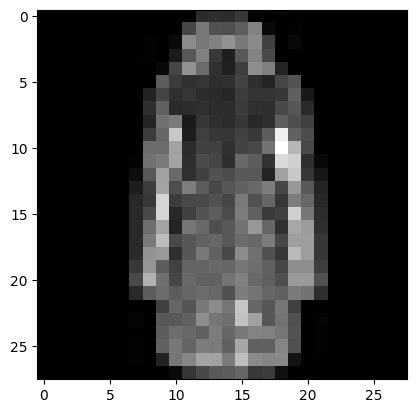

Cantidad de elementos con label 5 en train: 6000
Cantidad de elementos con label 5 en test: 1000


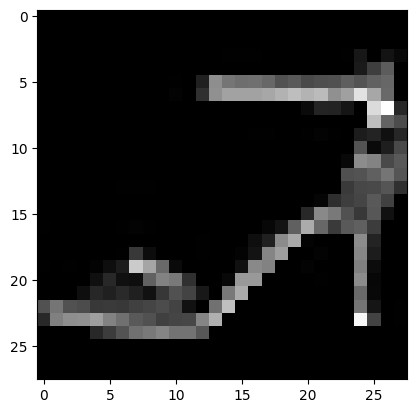

Cantidad de elementos con label 6 en train: 6000
Cantidad de elementos con label 6 en test: 1000


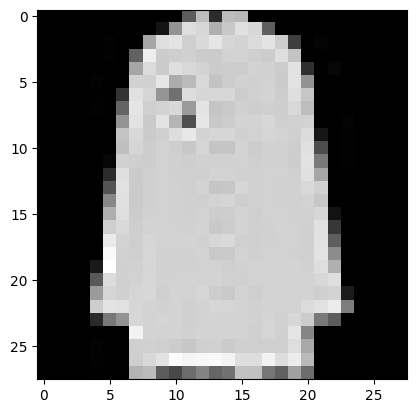

Cantidad de elementos con label 7 en train: 6000
Cantidad de elementos con label 7 en test: 1000


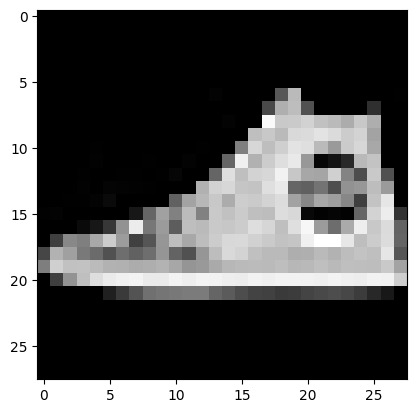

Cantidad de elementos con label 8 en train: 6000
Cantidad de elementos con label 8 en test: 1000


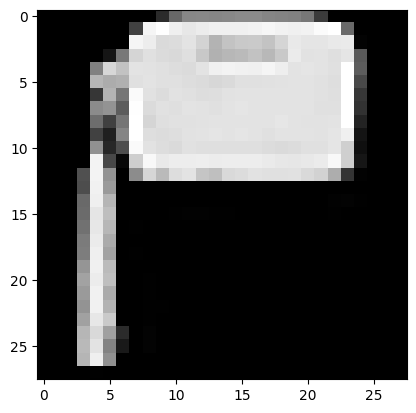

Cantidad de elementos con label 9 en train: 6000
Cantidad de elementos con label 9 en test: 1000


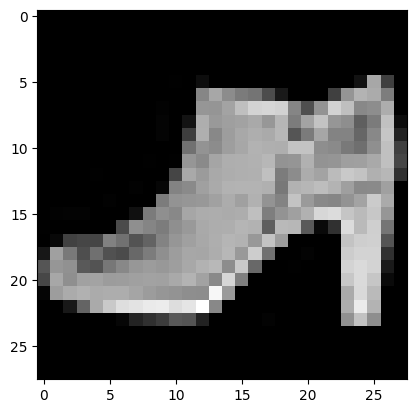

In [ ]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

gk = df_train.groupby('label')

for val in labels:
  grupo = gk.get_group(val)
  print("Cantidad de elementos con label " + str(val) + " en train: " + str(len(grupo)))
  print("Cantidad de elementos con label " + str(val) + " en test: " + str(len(gk_test.get_group(val))))
  row = grupo.iloc[[randint(0, len(grupo))]]
  array = np.reshape(row.drop(columns=["label"]).to_numpy(), (28, 28))

  plt.imshow(array, cmap='gray')
  plt.show()

# Redes Neuronales

In [ ]:
activation = 'relu'
solver = 'adam'
learning_rate_init = 0.0001
max_iter = 40
batch_size = 16

### Red 1

In [ ]:
hidden_layer_sizes_r1 = []

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


mlp_model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes_r1,
                          activation = activation,
                          learning_rate_init = learning_rate_init,
                          max_iter = max_iter,
                          batch_size=batch_size)

test_accuracys = []
train_accuracys = []

for i in range(max_iter):
  mlp_model.partial_fit(data_train, target_train, list(labels))

  target_test_predicted = mlp_model.predict(data_test)
  test_accuracy = accuracy_score(target_test, target_test_predicted)
  test_accuracys.append(test_accuracy)

  target_train_predicted = mlp_model.predict(data_train)
  train_accuracy = accuracy_score(target_train, target_train_predicted)
  train_accuracys.append(train_accuracy)

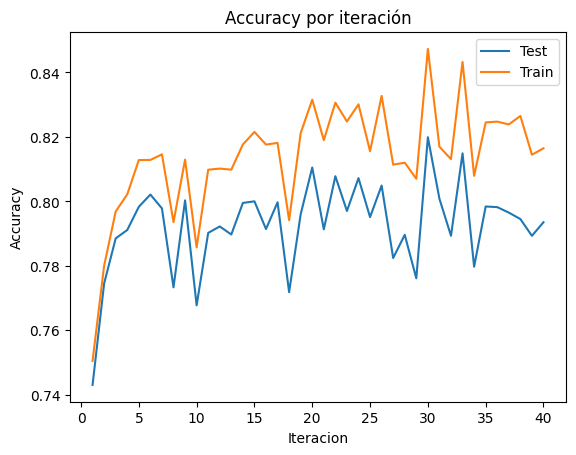

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(max_iter+1)[1::], test_accuracys, label="Test")
plt.plot(range(max_iter+1)[1::], train_accuracys, label="Train")

plt.xlabel("Iteracion")
plt.ylabel("Accuracy")
plt.title('Accuracy por iteración')
plt.legend()
plt.show()

In [ ]:
target_test_predicted = mlp_model.predict(data_test)
test_accuracy = accuracy_score(target_test, target_test_predicted)
print("Accuracy sobre Test: " + str(test_accuracy))

target_train_predicted = mlp_model.predict(data_train)
train_accuracy = accuracy_score(target_train, target_train_predicted)
print("Accuracy sobre Train: " + str(train_accuracy))

Accuracy sobre Test: 0.7935
Accuracy sobre Train: 0.8164666666666667


## Red 2

In [ ]:
hidden_layer_sizes_r2 = [100, 50]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


mlp_model_2 = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes_r2,
                            activation = activation,
                            learning_rate_init = learning_rate_init,
                            max_iter = max_iter,
                            batch_size=batch_size)

test_accuracys_2 = []
train_accuracys_2 = []

for i in range(max_iter):
  mlp_model_2.partial_fit(data_train, target_train, list(labels))

  target_test_predicted_2 = mlp_model_2.predict(data_test)
  test_accuracy_2 = accuracy_score(target_test, target_test_predicted_2)
  test_accuracys_2.append(test_accuracy_2)

  target_train_predicted_2 = mlp_model_2.predict(data_train)
  train_accuracy_2 = accuracy_score(target_train, target_train_predicted_2)
  train_accuracys_2.append(train_accuracy_2)

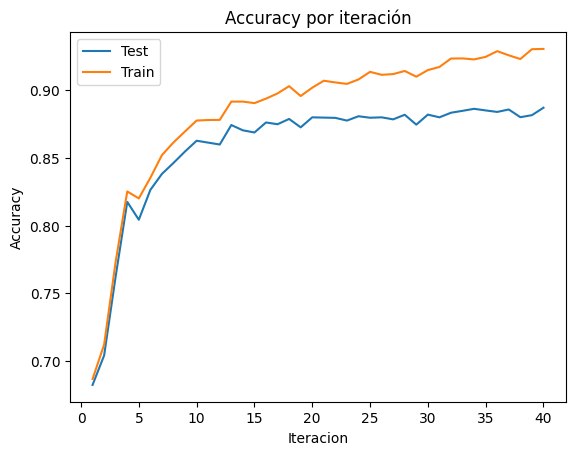

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(max_iter+1)[1::], test_accuracys_2, label="Test")
plt.plot(range(max_iter+1)[1::], train_accuracys_2, label="Train")

plt.xlabel("Iteracion")
plt.ylabel("Accuracy")
plt.title('Accuracy por iteración')
plt.legend()
plt.show()

In [ ]:
target_test_predicted_2 = mlp_model_2.predict(data_test)
test_accuracy_2 = accuracy_score(target_test, target_test_predicted_2)
print("Accuracy sobre Test: " + str(test_accuracy_2))

target_train_predicted_2 = mlp_model_2.predict(data_train)
train_accuracy_2 = accuracy_score(target_train, target_train_predicted_2)
print("Accuracy sobre Train: " + str(train_accuracy_2))

Accuracy sobre Test: 0.8871
Accuracy sobre Train: 0.9305666666666667


## Red 3

In [ ]:
hidden_layer_sizes_r3 = [100, 100, 100, 50, 50, 50]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


mlp_model_3 = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes_r3,
                          activation = activation,
                          learning_rate_init = learning_rate_init,
                          max_iter = max_iter,
                          batch_size=batch_size)

test_accuracys_3 = []
train_accuracys_3 = []

for i in range(max_iter):
  mlp_model_3.partial_fit(data_train, target_train, list(labels))

  target_test_predicted_3 = mlp_model_3.predict(data_test)
  test_accuracy_3 = accuracy_score(target_test, target_test_predicted_3)
  test_accuracys_3.append(test_accuracy_3)

  target_train_predicted_3 = mlp_model_3.predict(data_train)
  train_accuracy_3 = accuracy_score(target_train, target_train_predicted_3)
  train_accuracys_3.append(train_accuracy_3)

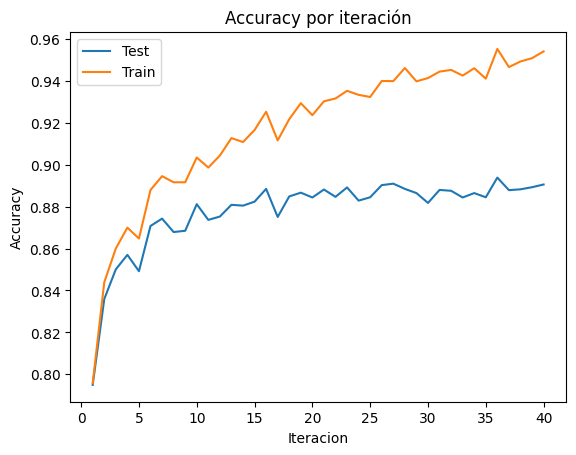

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(max_iter+1)[1::], test_accuracys_3, label="Test")
plt.plot(range(max_iter+1)[1::], train_accuracys_3, label="Train")

plt.xlabel("Iteracion")
plt.ylabel("Accuracy")
plt.title('Accuracy por iteración')
plt.legend()
plt.show()

In [ ]:
target_test_predicted_3 = mlp_model_3.predict(data_test)
test_accuracy_3 = accuracy_score(target_test, target_test_predicted_3)
print("Accuracy sobre Test: " + str(test_accuracy_3))

target_train_predicted_3 = mlp_model_3.predict(data_train)
train_accuracy_3 = accuracy_score(target_train, target_train_predicted_3)
print("Accuracy sobre Train: " + str(train_accuracy_3))

Accuracy sobre Test: 0.8906
Accuracy sobre Train: 0.95415


## Variar learning rate

In [ ]:
lr_values = [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
max_iter_lr = 40
hidden_layer_sizes_lr = [50]

test_accuracys_lr = [[], [], [], [], [], [], []]
train_accuracys_lr = [[], [], [], [], [], [], []]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

test_accuracys_lr = [[], [], [], [], [], [], []]
train_accuracys_lr = [[], [], [], [], [], [], []]

for i in range(len(lr_values)):
  val = lr_values[i]
  mlp_model_lr = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes_lr,
                                activation = activation,
                                learning_rate_init = val,
                                max_iter = max_iter_lr,
                                batch_size=batch_size)

  for _ in range(max_iter_lr):
    mlp_model_lr.partial_fit(data_train, target_train, list(labels))

    target_test_predicted_lr = mlp_model_lr.predict(data_test)
    test_accuracy_lr = accuracy_score(target_test, target_test_predicted_lr)
    test_accuracys_lr[i].append(test_accuracy_lr)

    target_train_predicted_lr = mlp_model_lr.predict(data_train)
    train_accuracy_lr = accuracy_score(target_train, target_train_predicted_lr)
    train_accuracys_lr[i].append(train_accuracy_lr)

Accuracy sobre Test: 0.1
Accuracy sobre Train: 0.1


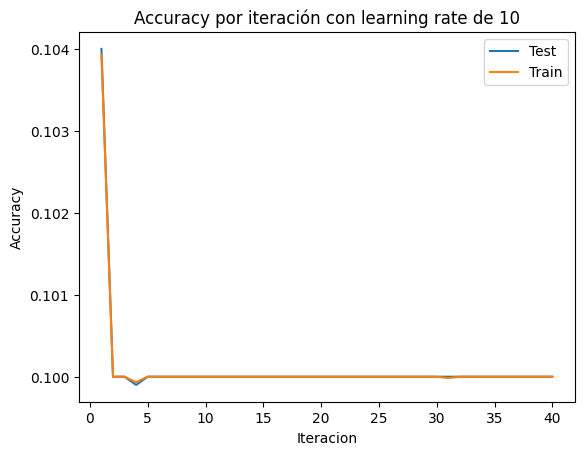

Accuracy sobre Test: 0.1
Accuracy sobre Train: 0.1


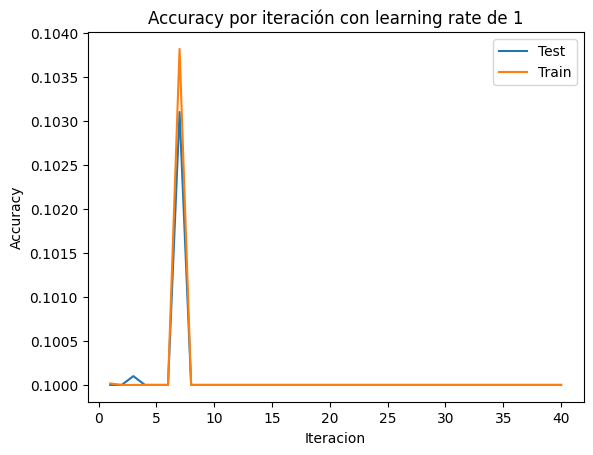

Accuracy sobre Test: 0.1
Accuracy sobre Train: 0.1


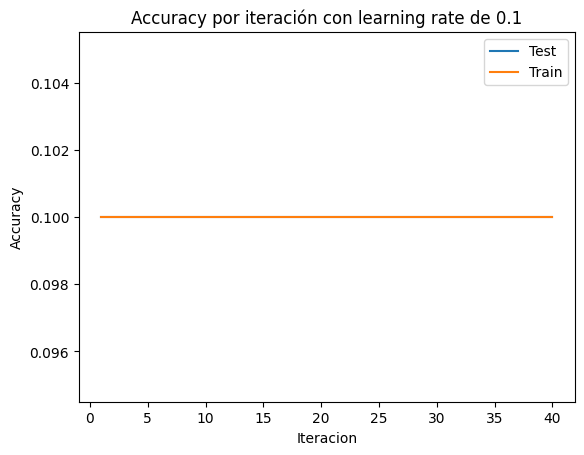

Accuracy sobre Test: 0.1
Accuracy sobre Train: 0.1


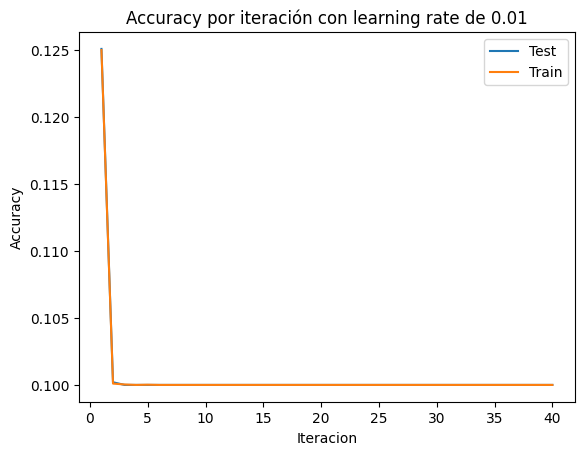

Accuracy sobre Test: 0.7121
Accuracy sobre Train: 0.7315333333333334


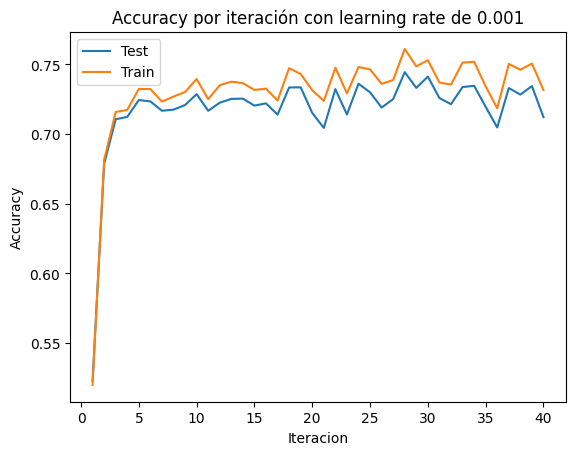

Accuracy sobre Test: 0.8622
Accuracy sobre Train: 0.8917166666666667


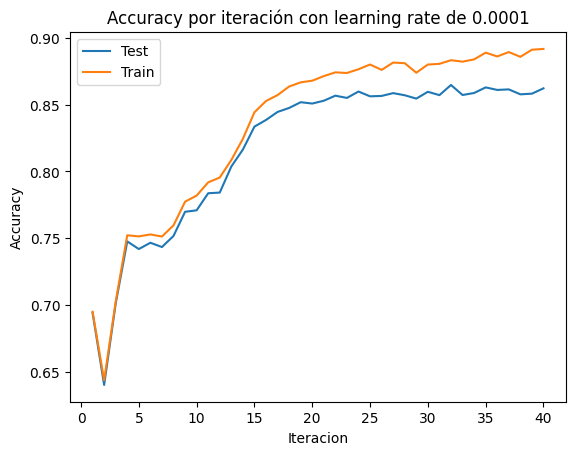

Accuracy sobre Test: 0.7836
Accuracy sobre Train: 0.7990333333333334


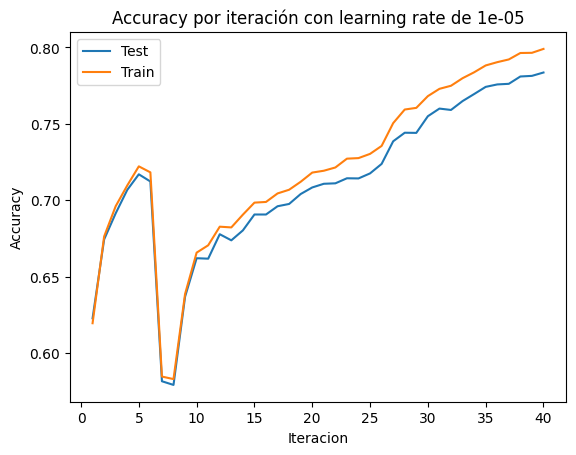

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(lr_values)):
  val = lr_values[i]

  print("Accuracy sobre Test: " + str(test_accuracys_lr[i][len(test_accuracys_lr[i])-1]))

  print("Accuracy sobre Train: " + str(train_accuracys_lr[i][len(train_accuracys_lr[i])-1]))

  plt.plot(range(max_iter_lr+1)[1::], test_accuracys_lr[i], label="Test")
  plt.plot(range(max_iter_lr+1)[1::], train_accuracys_lr[i], label="Train")

  plt.xlabel("Iteracion")
  plt.ylabel("Accuracy")
  plt.title('Accuracy por iteración con learning rate de ' + str(val))
  plt.legend()
  plt.show()